# Neural network to Student dropout rate

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score




In [2]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')
X = df.drop("Target", axis=1)
# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
# Assume for simplicity all features are categorical.
encoder.fit(X) 
# Apply the encoder.
X = encoder.transform(X)
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)
epochs = 100
n_hidden_neurons = 100

for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = MLPClassifier(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
        dnn.fit(X_train, y_train)
        
        DNN_scikit[i][j] = dnn
        
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", dnn.score(X_test, y_test))
        print()


/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  1e-05
Accuracy score on test set:  0.49265536723163844



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.0001
Accuracy score on test set:  0.4971751412429379



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.001
Accuracy score on test set:  0.488135593220339



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.01
Accuracy score on test set:  0.4847457627118644



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.1
Accuracy score on test set:  0.4824858757062147



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  1.0
Accuracy score on test set:  0.4745762711864407



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  10.0
Accuracy score on test set:  0.47231638418079097



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  1e-05
Accuracy score on test set:  0.7401129943502824



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  0.0001
Accuracy score on test set:  0.7333333333333333



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  0.001
Accuracy score on test set:  0.7367231638418079



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  0.01
Accuracy score on test set:  0.735593220338983



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  0.1
Accuracy score on test set:  0.7333333333333333



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  1.0
Accuracy score on test set:  0.727683615819209



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.0001
Lambda =  10.0
Accuracy score on test set:  0.6384180790960452



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  1e-05
Accuracy score on test set:  0.6689265536723163



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  0.0001
Accuracy score on test set:  0.6757062146892655



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  0.001
Accuracy score on test set:  0.6915254237288135



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  0.01
Accuracy score on test set:  0.6994350282485876



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  0.1
Accuracy score on test set:  0.7412429378531074



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.001
Lambda =  1.0
Accuracy score on test set:  0.7491525423728813

Learning rate  =  0.001
Lambda =  10.0
Accuracy score on test set:  0.6689265536723163

Learning rate  =  0.01
Lambda =  1e-05
Accuracy score on test set:  0.6689265536723163



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.01
Lambda =  0.0001
Accuracy score on test set:  0.6802259887005649



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.01
Lambda =  0.001
Accuracy score on test set:  0.6858757062146893



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.01
Lambda =  0.01
Accuracy score on test set:  0.7107344632768362



/Users/helelan/Desktop/FYS-STK4155/.venv_ml/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  0.01
Lambda =  0.1
Accuracy score on test set:  0.7152542372881356

Learning rate  =  0.01
Lambda =  1.0
Accuracy score on test set:  0.7401129943502824

Learning rate  =  0.01
Lambda =  10.0
Accuracy score on test set:  0.6779661016949152

Learning rate  =  0.1
Lambda =  1e-05
Accuracy score on test set:  0.672316384180791

Learning rate  =  0.1
Lambda =  0.0001
Accuracy score on test set:  0.6915254237288135

Learning rate  =  0.1
Lambda =  0.001
Accuracy score on test set:  0.6915254237288135

Learning rate  =  0.1
Lambda =  0.01
Accuracy score on test set:  0.7028248587570621

Learning rate  =  0.1
Lambda =  0.1
Accuracy score on test set:  0.7265536723163842

Learning rate  =  0.1
Lambda =  1.0
Accuracy score on test set:  0.7152542372881356

Learning rate  =  0.1
Lambda =  10.0
Accuracy score on test set:  0.6587570621468927

Learning rate  =  1.0
Lambda =  1e-05
Accuracy score on test set:  0.6418079096045197

Learning rate  =  1.0
Lambda =  0.0001
Accuracy sco

<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:32: SyntaxWarning: invalid escape sequence '\e'
<>:33: SyntaxWarning: invalid escape sequence '\l'
<>:25: SyntaxWarning: invalid escape sequence '\e'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:32: SyntaxWarning: invalid escape sequence '\e'
<>:33: SyntaxWarning: invalid escape sequence '\l'
/var/folders/97/_7kk5frs11nd2xh84yf4d9nw0000gp/T/ipykernel_46314/791585920.py:25: SyntaxWarning: invalid escape sequence '\e'
  ax.set_ylabel("$\eta$")
/var/folders/97/_7kk5frs11nd2xh84yf4d9nw0000gp/T/ipykernel_46314/791585920.py:26: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel("$\lambda$")
/var/folders/97/_7kk5frs11nd2xh84yf4d9nw0000gp/T/ipykernel_46314/791585920.py:32: SyntaxWarning: invalid escape sequence '\e'
  ax.set_ylabel("$\eta$")
/var/folders/97/_7kk5frs11nd2xh84yf4d9nw0000gp/T/ipykernel_46314/791585920.py:33: SyntaxWarning: invalid escape sequence '\l'
  ax.se

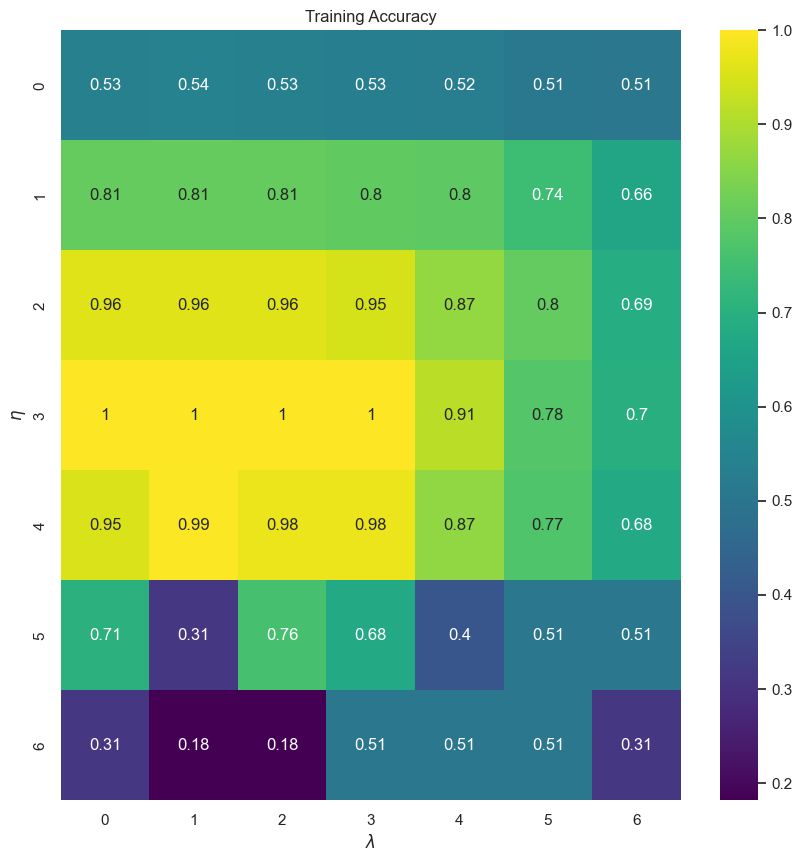

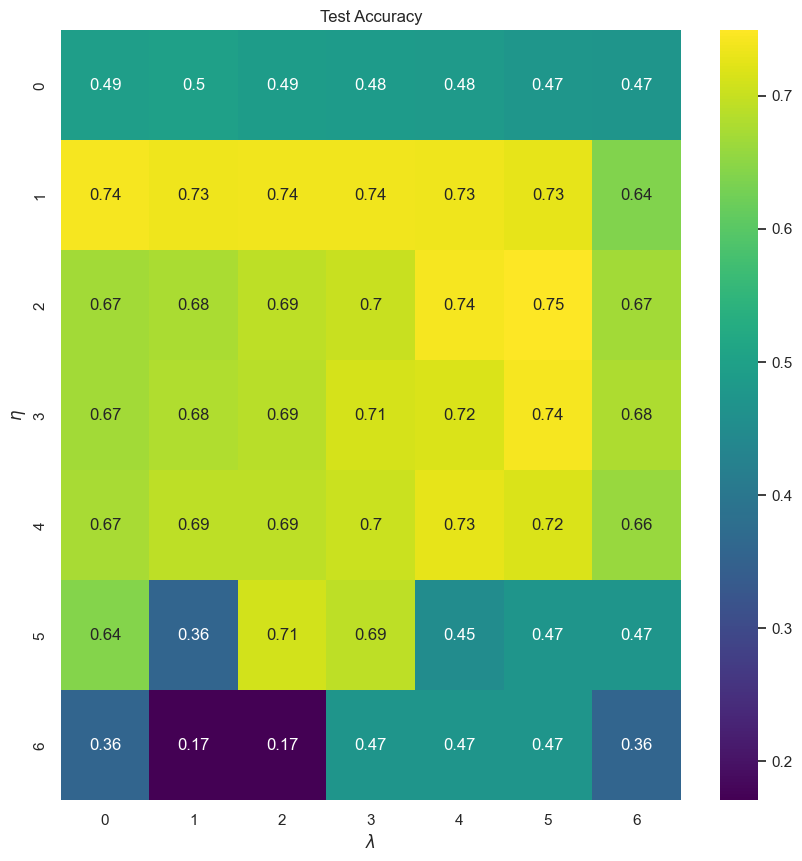

In [7]:
# optional
# visual representation of grid search
# uses seaborn heatmap, could probably do this in matplotlib
import seaborn as sns

sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(y_test, test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()
